# Customer Churn Prediction Using Logistic Regression Model and Artificial Neural Network (ANN)
- **Customer churn prediction is to measure why customers are leaving a business**
- **I will be looking at customer churn in telecom business.**
- **building a deep learning model ANN to predict the churn**
- **Building a Supervised Learning Model Logistic Regression**
- **Comparing the performance of both model based on accuracy, recall, F1 scores, and the best precision score,**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\py\CustomerchurnTelco\customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3101,1867-TJHTS,Female,0,No,No,58,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.80,4526.85,No
2023,4795-KTRTH,Female,1,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.00,371.65,Yes
5144,1078-TDCRN,Female,1,Yes,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.75,82.85,No
2217,0839-JTCUD,Female,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.90,5958.85,No
4549,2074-GUHPQ,Female,0,No,Yes,17,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),92.70,1556.85,No


**Droping useless column customerID"**

In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Converting TotalCharges from string to numeric**

In [6]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**It shows some values are blank string**

In [7]:

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


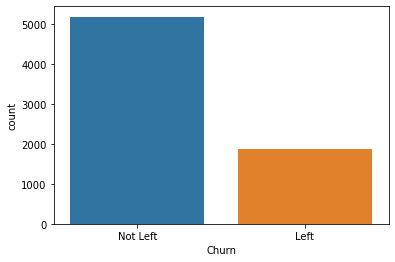

In [8]:
#Checking for target variable class imbalance
g = sns.countplot(df['Churn'])
g.set_xticklabels(['Not Left', 'Left'])
plt.show()

In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488].TotalCharges

' '

In [11]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**



In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1['SeniorCitizen']=pd.Categorical(df1['SeniorCitizen'])
df1.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column. Let's delete the rows with missing values in monthlycharges and tenure columns.

In [19]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [20]:
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Analysis

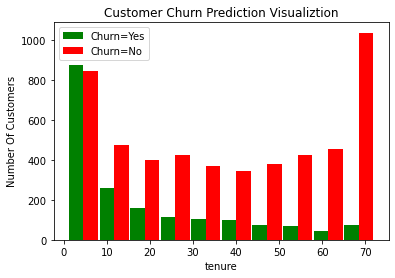

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

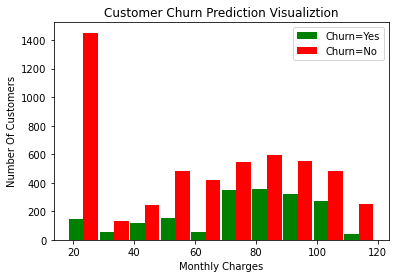

In [23]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [24]:
# divide the DS int numerical , categorical

numerics = ['float64', 'int64']
numeric_ds = df1.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds = df1.select_dtypes(exclude=numerics) # all categorical datatypes

**Numerical Dataset Plot**

**Categorical Dataset plot**

In [25]:
churn_count = len(df1['Churn'] == 'Yes')
print(churn_count)

7032


In [26]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**



In [27]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [28]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**



In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [30]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0, 1]
Categories (2, int64): [0, 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()


array([1, 0], dtype=int64)

**One hot encoding for categorical columns**



In [32]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4358,0,0,1,1,13,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3841,0,1,1,0,36,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1056,1,0,0,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6268,1,0,0,0,22,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2425,0,0,0,0,26,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [34]:
df2.dtypes

gender                                        int64
SeniorCitizen                              category
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                         int64
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetServ

In [35]:
# Scaling is important in Deep learning

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0, 1]
Categories (2, int64): [0, 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceP

**Train test split**



In [37]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']



In [38]:
data_splits = train_test_split(X, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = data_splits

In [39]:
X_train.shape

(5274, 26)

In [40]:
X_test.shape

(1758, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1720,1,1,0,0,0.014085,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
6657,1,0,1,0,0.676056,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4957,0,0,0,0,0.169014,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4681,0,1,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3509,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1469,0,0,0,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6992,0,0,1,1,0.985915,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1229,0,0,1,0,0.845070,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
5854,1,0,0,0,0.197183,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2393,1,0,1,1,0.450704,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1


In [42]:
len(X_train.columns)

26

In [43]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

**Oversample Training Data (SMOTE-NC)**
SMOTE is an oversampling method that balances imbalanced datasets by sampling (with replacement) minority class. SMOTE-NC stands for Synthetic Minority Over-sampling TEchnique for data with Numerical-Categorical features.

In [44]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=(X_train.dtypes == "category").values,
                random_state=42)

X_trainsm, y_trainsm = smote.fit_resample(X_train, y_train) #   only training data is oversampled.  

In [45]:
pd.Series(y_trainsm).value_counts()

0    3872
1    3872
Name: Churn, dtype: int64

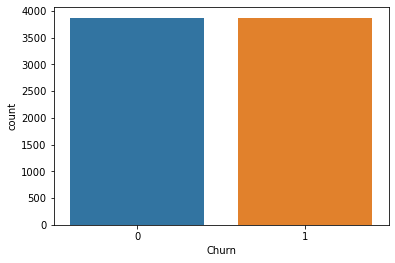

In [46]:
sns.countplot(x=y_trainsm);

# Models

# Logistic Regression Model

In [47]:
modelLR = LogisticRegression()
modelLR.fit(X_trainsm, y_trainsm)
predictions1 = modelLR.predict(X_test)


In [48]:
print(accuracy_score(y_test, predictions1))

0.7667804323094426


In [49]:
print(confusion_matrix(y_test, predictions1))

[[1009  282]
 [ 128  339]]


Text(0.5, 1.0, 'Logistic Regression Model: Confusion Matrix')

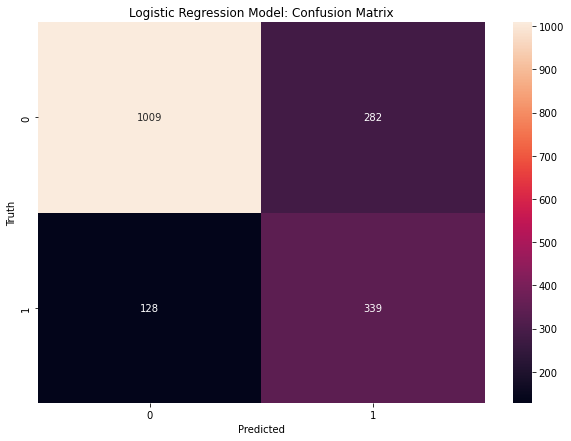

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Model: Confusion Matrix')

In [53]:
print(classification_report(y_test, predictions1, target_names = ['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1291
       Churn       0.55      0.73      0.62       467

    accuracy                           0.77      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.77      0.78      1758



**SMOTE we did succeed in increasing the number of true positives (correctly identified churners) (Recall 1 class) substantially**

**Precision (False Positive measure)** SO in this particular problem, it is okay to predict that a person is going to churn even if in the reality he/she is not going to churn . THis situation is still okay

**Recall (False Negative measure)** However , if we predict a person is not going to churn, but in fact that person is going to churn in reality, it could mean loss of business . So in this case recall is important to correctly point out those customers that are going to churn

# Decision Tree Classifier

In [54]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [55]:
model_dt_smote.fit(X_trainsm, y_trainsm)
predictions2 = model_dt_smote.predict(X_test)

In [56]:
print(accuracy_score(y_test, predictions2))

0.7497155858930603


In [57]:
print(confusion_matrix(y_test, predictions2))

[[975 316]
 [124 343]]


Text(0.5, 1.0, 'Logistic Regression Model: Confusion Matrix')

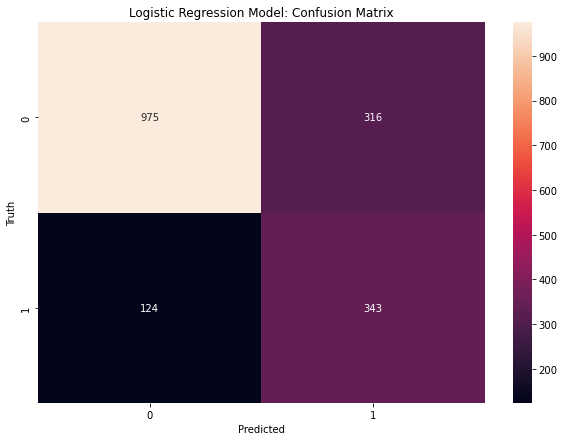

In [58]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Model: Confusion Matrix')

In [59]:
print(classification_report(y_test, predictions2, target_names = ['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.89      0.76      0.82      1291
       Churn       0.52      0.73      0.61       467

    accuracy                           0.75      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.79      0.75      0.76      1758



# Random Forest Classifier

In [60]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(X_trainsm, y_trainsm)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
print(classification_report(y_test, rf.predict(X_test), target_names = ['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1291
       Churn       0.52      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758



Text(0.5, 1.0, 'Random Forest')

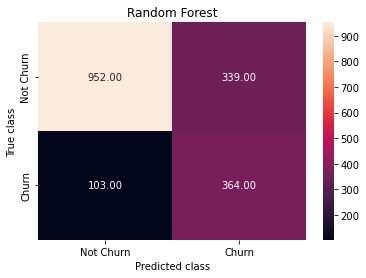

In [62]:
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix( y_test, y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = [ "Not Churn", "Churn"] , yticklabels = [ "Not Churn", "Churn"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [63]:
importance = rf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['Contract_Month-to-month', 'tenure', 'Contract_Two year', 'InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check', 'Contract_One year', 'InternetService_No', 'OnlineSecurity', 'TechSupport', 'InternetService_DSL', 'Dependents', 'Partner', 'OnlineBackup']


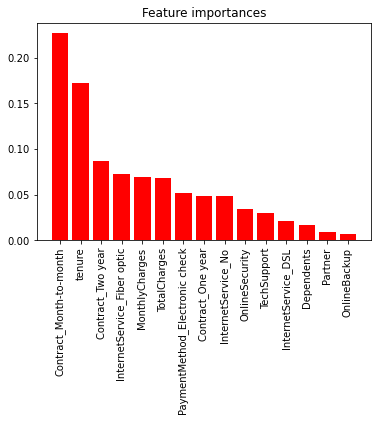

In [64]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

**Build a model (ANN) in tensorflow/keras**

In [65]:

 
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'), # input layer is Dense layer
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # In output layer,putting sigmoid function
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainsm, y_trainsm, epochs=100)

Epoch 1/100
242/242 [==============================] - 2s 3ms/step - loss: 0.5582 - accuracy: 0.7222
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7806
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.7868
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.7893
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.7935
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.7907
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.7986
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.7997
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.8017
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4197 - accura

242/242 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8586
Epoch 82/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8572
Epoch 83/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3270 - accuracy: 0.8561
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8591
Epoch 85/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3247 - accuracy: 0.8564
Epoch 86/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.8607
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8574
Epoch 88/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8595
Epoch 89/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8598
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3246 - accuracy: 

In [66]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7361


[0.5500236749649048, 0.7360637187957764]

In [67]:
yp = model.predict(X_test)
yp[:5] # this gives any range between zero to 1 because output layer has sigmoid function

55/55 [==============================] - 0s 3ms/step


array([[0.00523495],
       [0.62564427],
       [0.82876444],
       [0.5669378 ],
       [0.03882134]], dtype=float32)

In [68]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [69]:
y_pred[:10]

[0, 1, 1, 1, 0, 0, 1, 0, 0, 0]

In [70]:
y_test[:10]

593     0
4784    0
6150    0
3544    1
3129    0
1882    0
5377    0
3534    1
6225    0
1021    0
Name: Churn, dtype: int64

In [71]:
ClassificationReportANN=classification_report(y_test,y_pred)

print(classification_report(y_test,y_pred,target_names = ['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.86      0.77      0.81      1291
       Churn       0.50      0.65      0.57       467

    accuracy                           0.74      1758
   macro avg       0.68      0.71      0.69      1758
weighted avg       0.76      0.74      0.75      1758



Text(0.5, 1.0, 'ANN model: Confusion Matrix')

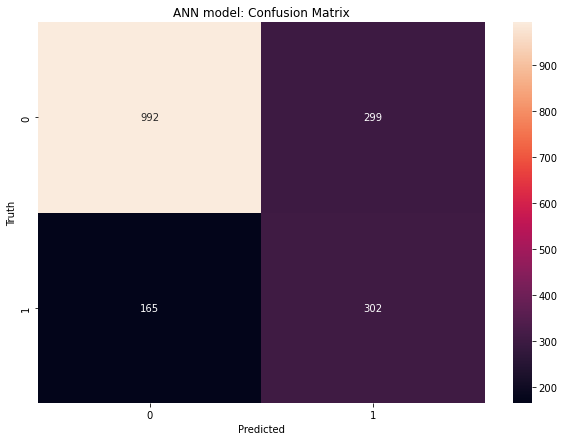

In [72]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('ANN model: Confusion Matrix')


**Here Random Forest Classifier Model obtained the best recall, F1 scores, and the best precision score, making it the most reliable machine learning classifier for this data set.**